In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.5.3'

In [13]:
distances_bert = dict()
cultures = list()
with open('../../data/distances/mean_cosine_distances_ada.txt', 'r') as file:
    for line in file:
        _, pair, _, m_distance = line.strip().split(' ')
        c1, c2 = pair.split('-')
        if c1 not in cultures:
            cultures.append(c1)
        if c2 not in cultures:
            cultures.append(c2)
            
        distances_bert[(c1, c2)] = 1 - np.float64(m_distance)

distances_bert

{('Sican', 'Recuay'): 0.13476243404578547,
 ('Sican', 'Vicus'): 0.10580617975893225,
 ('Sican', 'Lima'): 0.14467897716080746,
 ('Sican', 'Gallinazo'): 0.14985465971345502,
 ('Sican', 'Moche'): 0.121148440843729,
 ('Sican', 'Salinar'): 0.13398321499148003,
 ('Sican', 'Paracas'): 0.15485866919203684,
 ('Sican', 'Wari'): 0.14119584540000973,
 ('Sican', 'Cajamarca'): 0.16870124378086793,
 ('Sican', 'Cupisnique'): 0.13860158107241016,
 ('Sican', 'Pukara'): 0.14482280873055275,
 ('Sican', 'Nasca'): 0.14347374770463783,
 ('Sican', 'Chimu'): 0.1141795017772732,
 ('Sican', 'Chanca'): 0.12204736823384121,
 ('Sican', 'Chancay'): 0.15801317370259305,
 ('Sican', 'Inca'): 0.14312766597395987,
 ('Sican', 'Tiahuanaco'): 0.15296572330668168,
 ('Sican', 'Chincha'): 0.15131426484549204,
 ('Recuay', 'Vicus'): 0.1298529588476769,
 ('Recuay', 'Lima'): 0.13723397388712322,
 ('Recuay', 'Gallinazo'): 0.14991346664817085,
 ('Recuay', 'Moche'): 0.13131351947846637,
 ('Recuay', 'Salinar'): 0.1554005129060636,
 ('

In [14]:
df = pd.DataFrame(index=sorted(cultures), columns=sorted(cultures))

for c in cultures:
    df[c] = df[c].astype(np.float64)
df.head()

,Cajamarca,Chanca,Chancay,Chimu,Chincha,Cupisnique,Gallinazo,Inca,Lima,Moche,Nasca,Paracas,Pukara,Recuay,Salinar,Sican,Tiahuanaco,Vicus,Wari
Cajamarca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chancay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chimu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chincha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for c1 in cultures:
    for c2 in cultures:
        if c1 == c2:
            df[c1][c2] = 0
        elif (c1, c2) in distances_bert.keys():
            df[c1][c2] = distances_bert[(c1, c2)]
            df[c2][c1] = distances_bert[(c1, c2)]
        elif (c2, c1) in distances_bert.keys():
            df[c1][c2] = distances_bert[(c2, c1)]
            df[c2][c1] = distances_bert[(c2, c1)]
        else:
            df[c1][c2] = 0.0
            df[c2][c1] = 0.0

In [16]:
df

,Cajamarca,Chanca,Chancay,Chimu,Chincha,Cupisnique,Gallinazo,Inca,Lima,Moche,Nasca,Paracas,Pukara,Recuay,Salinar,Sican,Tiahuanaco,Vicus,Wari
Cajamarca,0.000000,0.162182,0.147314,0.166591,0.154008,0.159959,0.187796,0.155259,0.158066,0.165748,0.149436,0.119582,0.144602,0.163417,0.172205,0.168701,0.118929,0.165096,0.164080
Chanca,0.162182,0.000000,0.142894,0.119611,0.147493,0.148396,0.130752,0.136242,0.127695,0.117129,0.125979,0.150018,0.135639,0.126505,0.147930,0.122047,0.142763,0.113997,0.127435
Chancay,0.147314,0.142894,0.000000,0.153718,0.139249,0.161411,0.166498,0.144083,0.138866,0.148942,0.149492,0.138276,0.144117,0.149781,0.161042,0.158013,0.131660,0.151672,0.144301
Chimu,0.166591,0.119611,0.153718,0.000000,0.151208,0.140138,0.148153,0.141864,0.141030,0.121008,0.143420,0.155305,0.144942,0.134987,0.140217,0.114180,0.151498,0.110254,0.137663
Chincha,0.154008,0.147493,0.139249,0.151208,0.000000,0.157543,0.175253,0.137827,0.136165,0.144992,0.149734,0.133681,0.132971,0.144836,0.148611,0.151314,0.125924,0.148135,0.140416
Cupisnique,0.159959,0.148396,0.161411,0.140138,0.157543,0.000000,0.174663,0.155546,0.160071,0.142705,0.157416,0.155316,0.153543,0.154470,0.149785,0.138602,0.155553,0.135286,0.157088
Gallinazo,0.187796,0.130752,0.166498,0.148153,0.175253,0.174663,0.000000,0.168699,0.155523,0.142248,0.157085,0.176781,0.160079,0.149913,0.180173,0.149855,0.171321,0.144352,0.155812
Inca,0.155259,0.136242,0.144083,0.141864,0.137827,0.155546,0.168699,0.000000,0.137552,0.139281,0.148554,0.142884,0.144277,0.143942,0.148599,0.143128,0.136076,0.137832,0.139269
Lima,0.158066,0.127695,0.138866,0.141030,0.136165,0.160071,0.155523,0.137552,0.000000,0.135974,0.133818,0.141535,0.136188,0.137234,0.157226,0.144679,0.132312,0.136059,0.134793
Moche,0.165748,0.117129,0.148942,0.121008,0.144992,0.142705,0.142248,0.139281,0.135974,0.000000,0.140260,0.151623,0.138282,0.131314,0.142517,0.121148,0.146149,0.115166,0.134834


### Creamos un heatmap con las distancias

### Escalamos las distancias promedios para poder ver gráficamente mayores diferencias

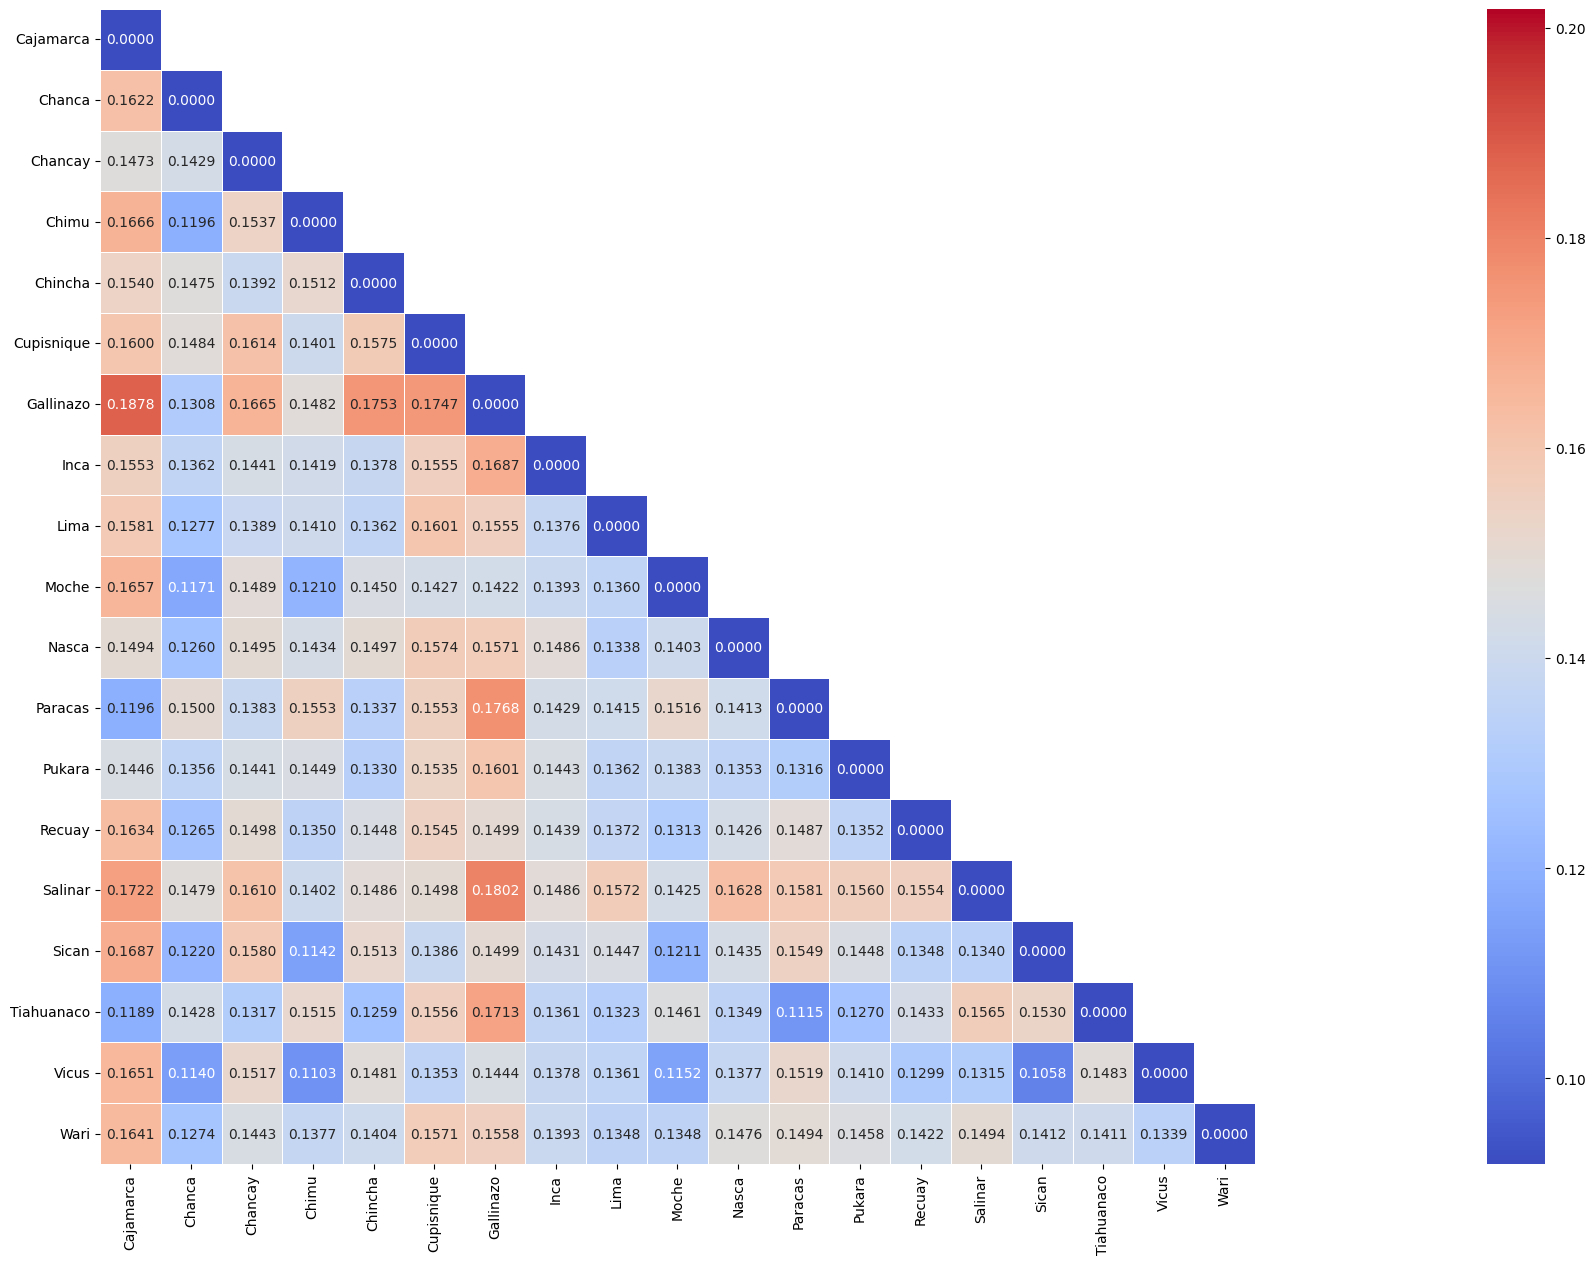

In [17]:
max_mean_distance = np.max(list(distances_bert.values()))
min_mean_distance = np.min(list(distances_bert.values()))
std_mean_distance = np.std(list(distances_bert.values()))

fig, ax = plt.subplots(figsize=(60, 15))
sns.heatmap(df, 
            vmax=max_mean_distance+std_mean_distance, 
            vmin=min_mean_distance-std_mean_distance, 
            cmap='coolwarm', 
            linewidths=.5, 
            square=True,
            annot=True,
            fmt=".4f",
            mask=np.triu(df),
            ax=ax)
plt.show()

In [19]:
culture_pairs = [(a, b) for idx, a in enumerate(cultures) for b in cultures[idx + 1:]]
culture_pairs

[('Sican', 'Recuay'),
 ('Sican', 'Vicus'),
 ('Sican', 'Lima'),
 ('Sican', 'Gallinazo'),
 ('Sican', 'Moche'),
 ('Sican', 'Salinar'),
 ('Sican', 'Paracas'),
 ('Sican', 'Wari'),
 ('Sican', 'Cajamarca'),
 ('Sican', 'Cupisnique'),
 ('Sican', 'Pukara'),
 ('Sican', 'Nasca'),
 ('Sican', 'Chimu'),
 ('Sican', 'Chanca'),
 ('Sican', 'Chancay'),
 ('Sican', 'Inca'),
 ('Sican', 'Tiahuanaco'),
 ('Sican', 'Chincha'),
 ('Recuay', 'Vicus'),
 ('Recuay', 'Lima'),
 ('Recuay', 'Gallinazo'),
 ('Recuay', 'Moche'),
 ('Recuay', 'Salinar'),
 ('Recuay', 'Paracas'),
 ('Recuay', 'Wari'),
 ('Recuay', 'Cajamarca'),
 ('Recuay', 'Cupisnique'),
 ('Recuay', 'Pukara'),
 ('Recuay', 'Nasca'),
 ('Recuay', 'Chimu'),
 ('Recuay', 'Chanca'),
 ('Recuay', 'Chancay'),
 ('Recuay', 'Inca'),
 ('Recuay', 'Tiahuanaco'),
 ('Recuay', 'Chincha'),
 ('Vicus', 'Lima'),
 ('Vicus', 'Gallinazo'),
 ('Vicus', 'Moche'),
 ('Vicus', 'Salinar'),
 ('Vicus', 'Paracas'),
 ('Vicus', 'Wari'),
 ('Vicus', 'Cajamarca'),
 ('Vicus', 'Cupisnique'),
 ('Vicus', 'Pu